<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [2]:
from bs4 import BeautifulSoup
import requests

jobs = pd.read_csv('./data/job_listings.csv')                
jobs.head()

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [3]:

# soup = BeautifulSoup(jobs['description'][0], 'html.parser')

# print(soup.prettify())

# description = soup.find_all('p')

# clean_des = (soup.get_text())

# print(clean_des)


# # to_remove = ["/R", "\\n", 'b"', '"',]
# # for i in range(0, 5):
# #     clean_des = clean_des.replace(to_remove[i], '')

# # clean_des

In [4]:
def Clean_Des(text):
    soup = BeautifulSoup(text, 'html.parser')

    description = soup.find_all('p')
    clean_des = (soup.get_text())
    to_remove = ["/R", '"', '', "\\n", "\n",]
    
    for i in range(0, 2):
        clean_des = clean_des.replace(to_remove[i], '')
#         print(clean_des)
#     print(cleaned)
    for i in range(3, 4):
        clean_des = clean_des.replace(to_remove[i], ' ')

    return clean_des[1:]

In [5]:
jobs['description'] = jobs['description'].apply(Clean_Des)
jobs.head()

,Unnamed: 0,description,title
0,0,Job Requirements: Conceptual understanding in ...,Data scientist
1,1,"'Job Description As a Data Scientist 1, you w...",Data Scientist I
2,2,'As a Data Scientist you will be working on co...,Data Scientist - Entry Level
3,3,"'$4,969 - $6,756 a monthContractUnder the gene...",Data Scientist
4,4,'Location: USA \xe2\x80\x93 multiple locations...,Data Scientist


## 2) Use Spacy to tokenize the listings 

In [6]:
from spacy.tokenizer import Tokenizer
nlp = spacy.load("en_core_web_lg")

STOP_WORDS = nlp.Defaults.stop_words.union(['coffee',' ', '  ', '   ', '-', 'im'])

In [7]:
def Tokenize(text):
    
    import re

    tokens = re.sub('[^a-zA-Z ]', '', text)
    tokens = tokens.lower()

    return tokens
    

In [8]:
jobs['tokens'] = jobs['description'].apply(Tokenize)

In [9]:
jobs.head()

,Unnamed: 0,description,title,tokens
0,0,Job Requirements: Conceptual understanding in ...,Data scientist,job requirements conceptual understanding in m...
1,1,"'Job Description As a Data Scientist 1, you w...",Data Scientist I,job description as a data scientist you will...
2,2,'As a Data Scientist you will be working on co...,Data Scientist - Entry Level,as a data scientist you will be working on con...
3,3,"'$4,969 - $6,756 a monthContractUnder the gene...",Data Scientist,a monthcontractunder the general supervisio...
4,4,'Location: USA \xe2\x80\x93 multiple locations...,Data Scientist,location usa xexx multiple locations years of...


In [10]:
tokenizer = Tokenizer(nlp.vocab)

tokens = []

for doc in tokenizer.pipe(jobs['tokens'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
            
    tokens.append(doc_tokens)


jobs['tokens'] = tokens

In [11]:
jobs['tokens'].head()

0    [job, requirements, conceptual, understanding,...
1    [job, description, data, scientist, help, buil...
2    [data, scientist, working, consulting, busines...
3    [monthcontractunder, general, supervision, pro...
4    [location, usa, xexx, multiple, locations, yea...
Name: tokens, dtype: object

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [12]:
def Count(text):
    vector = CountVectorizer()
    vector.fit(text)
    dtm = vector.transform(text)

#     print(vector.get_feature_names())

    return(dtm)

In [13]:
temp = jobs['tokens'].apply(Count)

In [14]:
vector = CountVectorizer()
vector.fit(jobs['tokens'][0])
dtm = vector.transform(jobs['tokens'][0])

# print(vector.get_feature_names())

print(dtm)

  (0, 28)	1
  (1, 58)	1
  (2, 8)	1
  (3, 72)	1
  (4, 38)	1
  (5, 33)	1
  (6, 44)	1
  (7, 35)	1
  (8, 45)	1
  (9, 4)	1
  (10, 30)	1
  (11, 68)	1
  (12, 2)	1
  (13, 36)	1
  (14, 37)	1
  (15, 57)	1
  (16, 46)	1
  (17, 56)	1
  (18, 20)	1
  (19, 10)	1
  (20, 71)	1
  (21, 31)	1
  (22, 25)	1
  (23, 15)	1
  (24, 27)	1
  :	:
  (55, 19)	1
  (56, 69)	1
  (57, 47)	1
  (58, 66)	1
  (59, 26)	1
  (60, 24)	1
  (61, 15)	1
  (62, 65)	1
  (63, 62)	1
  (64, 52)	1
  (65, 32)	1
  (66, 51)	1
  (67, 73)	1
  (68, 23)	1
  (69, 29)	1
  (70, 53)	1
  (71, 3)	1
  (72, 41)	1
  (73, 11)	1
  (74, 67)	1
  (75, 60)	1
  (76, 55)	1
  (77, 64)	1
  (78, 18)	1
  (79, 1)	1


## 4) Visualize the most common word counts

In [15]:
from sklearn.feature_extraction.text import CountVectorizer


vect = CountVectorizer(stop_words='english',
                       ngram_range=(1,2),
                       min_df=3,
                       max_df=0.25,
                       max_features=20)
vect.fit(jobs['description'])

# Get sparse dtm (i.e. transform the data)
wc = vect.transform(jobs['description'])

# Convert to dataframe
wc = pd.DataFrame(wc.todense(), columns=vect.get_feature_names())
print(wc.shape)
wc.head()

(426, 20)


,benefits,clients,cross,data driven,digital,engineers,functional,global,growth,health,intelligence,internal,lead,level,model,optimization,plus,process,project,visualization
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,2,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


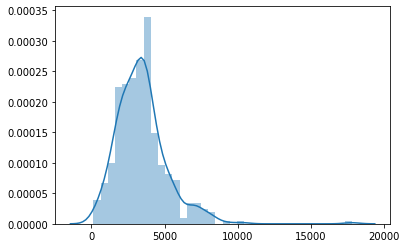

In [16]:
doc_len = [len(doc) for doc in jobs['description']]

import seaborn as sns

sns.distplot(doc_len);

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [17]:
data = jobs['description']

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english',
                        ngram_range=(1,2),
                        min_df=3,
                        max_df=0.25)

tf_matrix = tfidf.fit_transform(data)

# use feature names as column headers
tf_matrix = pd.DataFrame(tf_matrix.todense(), columns=tfidf.get_feature_names())

tf_matrix.head()

,000,000 employees,000 yearthe,04,10,10 time,10 years,100,100 000,100 companies,...,years technical,years work,years working,years xe2,yearthe,yes,york,york city,york offices,yrs
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [30]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(tf_matrix)

des = ["Use machine learning algorithms to program prosthetic limbs with the ability to recreate natural motion of the human body"]

des = tfidf.transform(des)

# Query Using kneighbors 
results = nn.kneighbors(des.todense())

# return top 5 job titles
print("Top 5 recommended job titles:\n")

for i, title in enumerate(results[1][0]):
    print(i+1, jobs['title'][title])


Top 5 recommended job titles:

1 Junior Data Scientist
2 Junior Data Scientist
3 Data Scientist, AR/VR
4 Data Science Internships
5 Data Scientist (Intern)


## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 